In [11]:
import gemmi

from rdkit import Chem

In [3]:
doc = gemmi.cif.read_file('/Users/richard/Downloads/Components-rel-alt.cif')

In [4]:
names = {b.name: b for b in doc}

In [5]:
b = names['ARG']
print(b.get_mmcif_category_names())

['_chem_comp.', '_chem_comp_atom.', '_chem_comp_bond.', '_pdbx_chem_comp_descriptor.', '_pdbx_chem_comp_identifier.', '_pdbx_chem_comp_audit.']


In [6]:
b.get_mmcif_category('_chem_comp.')

{'id': ['ARG'],
 'name': ['ARGININE'],
 'type': ['L-PEPTIDE LINKING'],
 'pdbx_type': ['ATOMP'],
 'formula': ['C6 H15 N4 O2'],
 'mon_nstd_parent_comp_id': [None],
 'pdbx_synonyms': [None],
 'pdbx_formal_charge': ['1'],
 'pdbx_initial_date': ['1999-07-08'],
 'pdbx_modified_date': ['2011-06-04'],
 'pdbx_ambiguous_flag': ['N'],
 'pdbx_release_status': ['REL'],
 'pdbx_replaced_by': [None],
 'pdbx_replaces': [None],
 'formula_weight': ['175.209'],
 'one_letter_code': ['R'],
 'three_letter_code': ['ARG'],
 'pdbx_model_coordinates_details': [None],
 'pdbx_model_coordinates_missing_flag': ['N'],
 'pdbx_ideal_coordinates_details': ['OpenEye/OEToolkits V1.4.2'],
 'pdbx_ideal_coordinates_missing_flag': ['N'],
 'pdbx_model_coordinates_db_code': [None],
 'pdbx_subcomponent_list': [None],
 'pdbx_processing_site': ['RCSB']}

In [7]:
b.get_mmcif_category('_chem_comp_atom.')

{'comp_id': ['ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG'],
 'atom_id': ['N',
  'CA',
  'C',
  'O',
  'CB',
  'CG',
  'CD',
  'NE',
  'CZ',
  'NH1',
  'NH2',
  'OXT',
  'H',
  'H2',
  'HA',
  'HB2',
  'HB3',
  'HG2',
  'HG3',
  'HD2',
  'HD3',
  'HE',
  'HH11',
  'HH12',
  'HH21',
  'HH22',
  'HXT'],
 'alt_atom_id': ['N',
  'CA',
  'C',
  'O',
  'CB',
  'CG',
  'CD',
  'NE',
  'CZ',
  'NH1',
  'NH2',
  'OXT',
  'H',
  'HN2',
  'HA',
  '1HB',
  '2HB',
  '1HG',
  '2HG',
  '1HD',
  '2HD',
  'HE',
  '1HH1',
  '2HH1',
  '1HH2',
  '2HH2',
  'HXT'],
 'type_symbol': ['N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'N',
  'C',
  'N',
  'N',
  'O',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H'],
 'charge': ['0',
  '0',
  '0',
  '0',
  '0',
  '0',

In [8]:
b.get_mmcif_category('_chem_comp_bond.')

{'comp_id': ['ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG'],
 'atom_id_1': ['N',
  'N',
  'N',
  'CA',
  'CA',
  'CA',
  'C',
  'C',
  'CB',
  'CB',
  'CB',
  'CG',
  'CG',
  'CG',
  'CD',
  'CD',
  'CD',
  'NE',
  'NE',
  'CZ',
  'CZ',
  'NH1',
  'NH1',
  'NH2',
  'NH2',
  'OXT'],
 'atom_id_2': ['CA',
  'H',
  'H2',
  'C',
  'CB',
  'HA',
  'O',
  'OXT',
  'CG',
  'HB2',
  'HB3',
  'CD',
  'HG2',
  'HG3',
  'NE',
  'HD2',
  'HD3',
  'CZ',
  'HE',
  'NH1',
  'NH2',
  'HH11',
  'HH12',
  'HH21',
  'HH22',
  'HXT'],
 'value_order': ['SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'DOUB',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'DOUB',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING'],
 'pdbx_aromatic_fla

In [13]:
def block_to_mol(b: gemmi.cif.Block, exclude_leaving_atoms=False) -> Chem.Mol:
    """Convert gemmi Block to RDKit Mol"""
    orders = {
        'SING': Chem.rdchem.BondType.SINGLE,
        'DOUB': Chem.rdchem.BondType.DOUBLE,
        'TRIP': Chem.rdchem.BondType.TRIPLE,
    }

    atom_chiralities = {
        'R': Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
        'S': Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
        'N': Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    }

    mol = Chem.EditableMol(Chem.Mol())

    # populate atoms
    atoms = b.get_mmcif_category('_chem_comp_atom.')
    if not atoms:  # e.g. UNL
        return Chem.Mol()
    
    leaving_atom_indices = set()
    for i, (elem, c, a, s, l) in enumerate(zip(
                                atoms['type_symbol'],
                                atoms['charge'],
                                atoms['pdbx_aromatic_flag'],
                                atoms['pdbx_stereo_config'],
                                atoms['pdbx_leaving_atom_flag'])):
        isotope = 0
        if exclude_leaving_atoms and l == 'Y':
            elem = '*'
            a = 'N'
            c = 0
            s = 'N'
            leaving_atom_indices.add(i)
        else:
            if elem == 'X': # e.g. ASX
                elem = '*'
            elif elem == 'D':  # e.g. D3O
                elem = 'H'
                isotope = 3
            if c is None:  # e.g. 3CD
                c = 0
        atom = Chem.Atom(elem.capitalize())
        atom.SetIsotope(isotope)
        atom.SetIsAromatic(a == 'Y')
        atom.SetFormalCharge(int(c))
        atom.SetNoImplicit(True)
        atom.SetChiralTag(atom_chiralities[s])
        mol.AddAtom(atom)

    # bonds with orders
    bonds = b.get_mmcif_category('_chem_comp_bond.')    
    if bonds:
        id_to_index = {nm: i for i, nm in enumerate(b.get_mmcif_category('_chem_comp_atom.')['atom_id'])}

        for x, y, o in zip(bonds['atom_id_1'], bonds['atom_id_2'], bonds['value_order']):
            i, j = id_to_index[x], id_to_index[y]
            if not (i in leaving_atom_indices and j in leaving_atom_indices):
                mol.AddBond(i, j, order=orders[o])
            
    if exclude_leaving_atoms:
        to_remove = []
        # remove any leaving atoms that now have no bonds
        # e.g. ARG removes -OH leaving -*.* with an orphan *
        m = mol.GetMol()
        for i in leaving_atom_indices:
            if not m.GetAtomWithIdx(i).GetBonds():
                to_remove.append(i)
        # remove in descending order to avoid grief
        for i in sorted(to_remove, reverse=True):
            mol.RemoveAtom(i)

    return mol.GetMol()

In [14]:
for b in doc:
    block_to_mol(b)

In [18]:
for b in doc:
    block_to_mol(b, exclude_leaving_atoms=True)

In [15]:
b = doc['ARG']

In [16]:
m = block_to_mol(b, exclude_leaving_atoms=True)

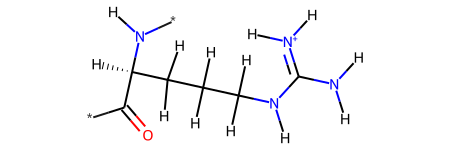

In [17]:
m

In [164]:
at = m.GetAtomWithIdx(0)

In [165]:
at.GetBonds()

(<rdkit.Chem.rdchem.Bond at 0x363b96f80>,
 <rdkit.Chem.rdchem.Bond at 0x363c91fc0>)

In [166]:
m = Chem.EditableMol(m)


In [168]:
m.RemoveAtom?

In [153]:
b.GetBeginAtomIdx()

11

In [145]:
m.RemoveAtom?

In [126]:
for atom in m.GetAtoms():
    print(atom.GetIsotope())

3
0


In [121]:
b = doc['D3O']

In [122]:
b.get_mmcif_category('_chem_comp_atom.')

{'comp_id': ['D3O', 'D3O', 'D3O', 'D3O'],
 'atom_id': ['O', 'D1', 'D2', 'D3'],
 'alt_atom_id': ['O', 'D1', 'D2', 'D3'],
 'type_symbol': ['O', 'D', 'D', 'D'],
 'charge': ['1', '0', '0', '0'],
 'pdbx_align': ['1', '1', '1', '1'],
 'pdbx_aromatic_flag': ['N', 'N', 'N', 'N'],
 'pdbx_leaving_atom_flag': ['N', 'N', 'N', 'N'],
 'pdbx_stereo_config': ['N', 'N', 'N', 'N'],
 'model_Cartn_x': ['1.534', '2.484', '1.217', '1.217'],
 'model_Cartn_y': ['37.717', '37.717', '37.717', '38.493'],
 'model_Cartn_z': ['-2.061', '-2.061', '-1.165', '-2.509'],
 'pdbx_model_Cartn_x_ideal': ['-0.000', '-0.001', '0.811', '-0.811'],
 'pdbx_model_Cartn_y_ideal': ['-0.000', '-0.937', '0.468', '0.469'],
 'pdbx_model_Cartn_z_ideal': ['0.038', '-0.203', '-0.203', '-0.203'],
 'pdbx_component_atom_id': ['O', 'D1', 'D2', 'D3'],
 'pdbx_component_comp_id': ['D3O', 'D3O', 'D3O', 'D3O'],
 'pdbx_ordinal': ['1', '2', '3', '4']}

In [87]:
a = Chem.Atom('C')

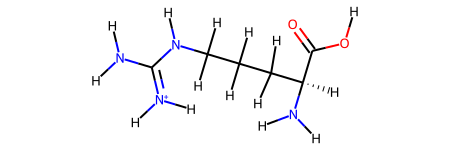

In [95]:
mol.GetMol()

In [69]:
mol.AddBond?

In [56]:
mol.AddAtom(Chem.Atom('C'))

0

In [40]:
b.get_mmcif_category('_chem_comp_bond.')

{'comp_id': ['ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG',
  'ARG'],
 'atom_id_1': ['N',
  'N',
  'N',
  'CA',
  'CA',
  'CA',
  'C',
  'C',
  'CB',
  'CB',
  'CB',
  'CG',
  'CG',
  'CG',
  'CD',
  'CD',
  'CD',
  'NE',
  'NE',
  'CZ',
  'CZ',
  'NH1',
  'NH1',
  'NH2',
  'NH2',
  'OXT'],
 'atom_id_2': ['CA',
  'H',
  'H2',
  'C',
  'CB',
  'HA',
  'O',
  'OXT',
  'CG',
  'HB2',
  'HB3',
  'CD',
  'HG2',
  'HG3',
  'NE',
  'HD2',
  'HD3',
  'CZ',
  'HE',
  'NH1',
  'NH2',
  'HH11',
  'HH12',
  'HH21',
  'HH22',
  'HXT'],
 'value_order': ['SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'DOUB',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING',
  'DOUB',
  'SING',
  'SING',
  'SING',
  'SING',
  'SING'],
 'pdbx_aromatic_fla

In [42]:
a1 = b.get_mmcif_category('_chem_comp_bond.')['atom_id_1']
a2 = b.get_mmcif_category('_chem_comp_bond.')['atom_id_2']
order = b.get_mmcif_category('_chem_comp_bond.')['value_order']

print(list(zip(a1, a2, order)))

[('N', 'CA', 'SING'), ('N', 'H', 'SING'), ('N', 'H2', 'SING'), ('CA', 'C', 'SING'), ('CA', 'CB', 'SING'), ('CA', 'HA', 'SING'), ('C', 'O', 'DOUB'), ('C', 'OXT', 'SING'), ('CB', 'CG', 'SING'), ('CB', 'HB2', 'SING'), ('CB', 'HB3', 'SING'), ('CG', 'CD', 'SING'), ('CG', 'HG2', 'SING'), ('CG', 'HG3', 'SING'), ('CD', 'NE', 'SING'), ('CD', 'HD2', 'SING'), ('CD', 'HD3', 'SING'), ('NE', 'CZ', 'SING'), ('NE', 'HE', 'SING'), ('CZ', 'NH1', 'SING'), ('CZ', 'NH2', 'DOUB'), ('NH1', 'HH11', 'SING'), ('NH1', 'HH12', 'SING'), ('NH2', 'HH21', 'SING'), ('NH2', 'HH22', 'SING'), ('OXT', 'HXT', 'SING')]


In [ ]:
Chem.rdchem.ChiralType.